# **Kaggle: House Prices - Advanced Regression Techniques No Supervisado**

In [62]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np

In [63]:
df = pd.read_csv("data/train.csv")

In [89]:
# Identificar tipos de columnas
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [90]:
# Separar variables independientes y dependientes
y = df['SalePrice']
X = df.loc[:, numerical_cols]

In [120]:
X = X.drop(['Id', 'SalePrice'], axis=1)

In [121]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


In [122]:
for column in X.columns: 
    mediana = X[column].median()  
    X[column] = X[column].fillna(mediana)  

In [123]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [124]:
X.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


Es fundamental estandarizar los datos antes de aplicar PCA. Esto se debe a que PCA es sensible a las escalas de las variables, y una columna con valores grandes podría dominar sobre las demás.

In [125]:
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=len(X.columns)))
pca_pipe.fit(X)

modelo_pca = pca_pipe['pca']

In [107]:
pca_pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=38))])

In [126]:
# Devuelve la matriz de componentes principales
pca_pipe['pca'].components_

array([[-1.62558899e-02,  1.61085880e-01,  1.06962838e-01, ...,
        -1.09995343e-02,  2.19258338e-02, -1.34078775e-02],
       [ 1.65260939e-01, -1.17807986e-02, -3.11530384e-02, ...,
         2.67598794e-02,  2.85671266e-02, -3.62277083e-02],
       [ 2.25945666e-01, -2.74929030e-01, -2.79777769e-01, ...,
        -4.21024326e-02,  4.47017100e-03, -1.20928553e-03],
       ...,
       [-2.61995067e-02,  1.74354259e-02, -4.14030109e-03, ...,
         1.22554383e-02, -4.45701191e-03,  6.95975618e-03],
       [ 0.00000000e+00,  1.94193919e-16, -2.46747927e-16, ...,
         1.05919499e-16, -1.15786929e-16,  5.78411657e-17],
       [ 1.41181289e-16, -2.62339708e-17, -2.03541323e-17, ...,
        -5.54910050e-17, -2.66913562e-16,  2.48322655e-16]])

In [127]:
# Vectores de las componentes principales, que son las direcciones de máxima varianza en los datos transformados
modelo_pca.components_

array([[-1.62558899e-02,  1.61085880e-01,  1.06962838e-01, ...,
        -1.09995343e-02,  2.19258338e-02, -1.34078775e-02],
       [ 1.65260939e-01, -1.17807986e-02, -3.11530384e-02, ...,
         2.67598794e-02,  2.85671266e-02, -3.62277083e-02],
       [ 2.25945666e-01, -2.74929030e-01, -2.79777769e-01, ...,
        -4.21024326e-02,  4.47017100e-03, -1.20928553e-03],
       ...,
       [-2.61995067e-02,  1.74354259e-02, -4.14030109e-03, ...,
         1.22554383e-02, -4.45701191e-03,  6.95975618e-03],
       [ 0.00000000e+00,  1.94193919e-16, -2.46747927e-16, ...,
         1.05919499e-16, -1.15786929e-16,  5.78411657e-17],
       [ 1.41181289e-16, -2.62339708e-17, -2.03541323e-17, ...,
        -5.54910050e-17, -2.66913562e-16,  2.48322655e-16]])

In [128]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
indice_pc = [f"PC{i}" for i in range(1, 37)]
pd.DataFrame(
    data = modelo_pca.components_,
    columns = X.columns,
    index=indice_pc
)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
PC1,-1.625589e-02,1.610859e-01,1.069628e-01,3.019104e-01,-8.338899e-02,2.376288e-01,2.087520e-01,1.949279e-01,0.140403,-0.012377,...,2.790111e-01,1.336473e-01,1.494497e-01,-7.465517e-02,1.665517e-02,3.076100e-02,5.011861e-02,-1.099953e-02,2.192583e-02,-1.340788e-02
PC2,1.652609e-01,-1.178080e-02,-3.115304e-02,-1.881107e-02,6.066285e-02,-1.975249e-01,-8.743510e-02,-1.990661e-02,-0.290762,-0.070222,...,-1.016625e-01,-6.826272e-02,3.923125e-02,1.179780e-01,-3.027487e-02,1.683041e-02,1.383899e-02,2.675988e-02,2.856713e-02,-3.622771e-02
PC3,2.259457e-01,-2.749290e-01,-2.797778e-01,1.062271e-01,-1.330876e-01,3.244285e-01,2.662794e-01,-2.796858e-03,-0.219868,-0.172147,...,3.318190e-02,-2.287629e-02,1.580375e-02,-1.848507e-01,-2.946276e-03,-1.250375e-01,-1.570623e-01,-4.210243e-02,4.470171e-03,-1.209286e-03
PC4,-2.989335e-01,1.331351e-01,-2.937597e-02,6.973524e-03,-9.110138e-02,-3.036251e-02,-2.741778e-02,-4.892424e-02,-0.337362,-0.091941,...,3.113226e-02,-1.398087e-01,-3.245736e-02,5.952521e-02,5.033119e-02,-6.237784e-02,-7.581848e-02,-2.280312e-02,4.392415e-02,-4.657560e-02
PC5,3.037491e-01,-5.842153e-02,-4.104506e-02,-1.313866e-01,-3.879052e-01,2.215062e-02,-1.516474e-01,1.629123e-02,0.144747,-0.079191,...,-1.868537e-02,-4.568767e-02,-1.464792e-01,4.088068e-02,-7.062605e-02,-2.170450e-01,4.967900e-03,1.277530e-03,-7.258008e-02,6.270377e-02
PC6,-1.627976e-01,1.399101e-01,4.668888e-02,3.764620e-03,2.036946e-01,-9.322194e-03,1.936474e-01,-1.019903e-01,-0.069542,0.053030,...,-4.062698e-03,1.418236e-01,-1.168218e-01,1.180445e-01,4.252966e-02,-2.560232e-01,-4.816955e-04,8.402605e-02,-5.362862e-01,5.881106e-01
PC7,7.976137e-02,-6.828580e-02,1.067994e-01,-2.617864e-02,3.551864e-01,-1.987082e-03,2.300321e-01,-9.948767e-02,0.034987,0.054000,...,-4.832399e-02,3.111799e-01,-1.243045e-01,-1.183655e-01,2.464025e-01,-3.226014e-01,-5.218252e-02,1.647789e-01,2.390183e-01,-4.132736e-02
PC8,1.078172e-01,-6.216228e-02,-9.766075e-02,9.277120e-02,8.359000e-02,-2.523708e-02,1.971905e-01,-2.928564e-01,-0.013398,0.116595,...,-1.099700e-01,6.627297e-02,2.708649e-01,1.851661e-01,-1.548819e-01,-1.148876e-01,4.103806e-01,-1.093362e-02,7.415293e-02,-2.645511e-01
PC9,2.287185e-01,-2.811271e-01,-8.715604e-02,6.033522e-02,1.732459e-01,-3.059937e-02,1.002910e-01,-1.884289e-02,-0.100577,0.311356,...,-9.276212e-02,-3.875199e-02,9.610179e-02,-2.137066e-01,-2.026832e-01,5.477900e-01,-1.319985e-01,2.181479e-01,-9.261083e-02,2.944326e-01
PC10,-1.421899e-01,1.049880e-01,2.359465e-01,-1.556485e-01,-3.445630e-01,1.659600e-01,-1.171075e-01,-1.473540e-01,-0.209532,0.547025,...,-4.471058e-02,2.761791e-01,-4.944846e-02,-2.644100e-01,-3.094944e-01,-6.114507e-02,1.925358e-02,-1.615448e-01,-2.097307e-02,-5.567541e-02


In [129]:
# Porcentaje de la varianza total explicada por cada componente principal
modelo_pca.explained_variance_ratio_

array([1.97880782e-01, 8.89808538e-02, 7.14538197e-02, 5.61878371e-02,
       4.10433454e-02, 3.31424938e-02, 3.19965623e-02, 3.15011987e-02,
       3.07738795e-02, 3.01514089e-02, 2.90839884e-02, 2.83714734e-02,
       2.80826800e-02, 2.65448566e-02, 2.54988260e-02, 2.49519978e-02,
       2.34631828e-02, 2.25696164e-02, 2.17872439e-02, 2.04877277e-02,
       1.87147015e-02, 1.73539145e-02, 1.63291777e-02, 1.50143326e-02,
       1.19545750e-02, 1.08162919e-02, 8.70596768e-03, 7.80709252e-03,
       7.13518452e-03, 6.72281356e-03, 5.38812950e-03, 3.96951136e-03,
       3.50779564e-03, 2.62673726e-03, 2.54855178e-18, 1.68212354e-18])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.19788078 0.28686164 0.35831546 0.41450329 0.45554664 0.48868913
 0.52068569 0.55218689 0.58296077 0.61311218 0.64219617 0.67056764
 0.69865032 0.72519518 0.75069401 0.775646   0.79910919 0.8216788
 0.84346605 0.86395377 0.88266848 0.90002239 0.91635157 0.9313659
 0.94332048 0.95413677 0.96284274 0.97064983 0.97778501 0.98450783
 0.98989596 0.99386547 0.99737326 1.         1.         1.        ]


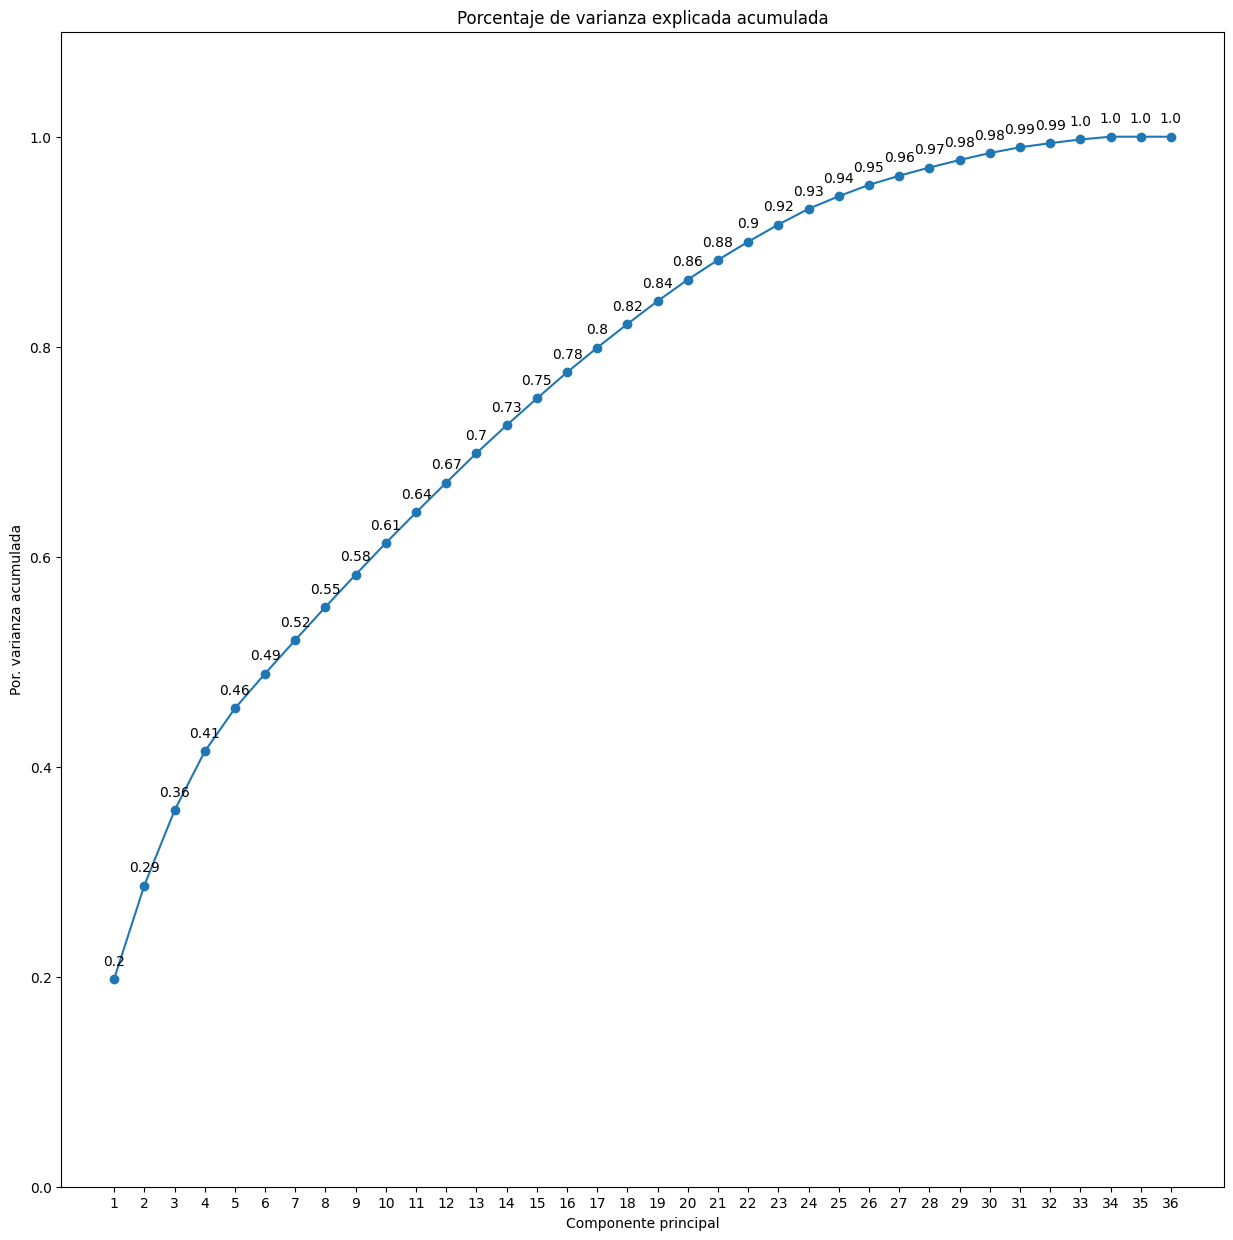

In [130]:
# Porcentaje de varianza explicada acumulada
import matplotlib.pyplot as plt

prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
ax.plot(
    np.arange(len(X.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [131]:
# Proyección de las observaciones de entrenamiento

pca_pipe = make_pipeline(StandardScaler(), PCA(n_components=26))
modelo_pca = pca_pipe['pca']
proyecciones = pca_pipe.fit_transform(X)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = [f"PC{i}" for i in range(1, 27)],
    index   = X.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
0,1.466021,0.375461,1.698616,-1.935831,0.530367,1.219198,-0.818926,-0.161224,-0.589498,0.015576,...,0.879810,0.157221,-0.647405,-0.686780,0.158064,-0.393927,-0.040782,-0.379262,-0.235140,-0.276747
1,-0.032837,-1.058352,-1.259901,-0.039478,-1.734416,-0.335394,3.477630,-0.662057,-0.070156,0.272488,...,0.170488,0.172790,0.009439,-0.428977,-1.374848,0.574135,-0.294188,0.684568,0.188880,-0.308562
2,1.652691,0.252552,1.475425,-1.374305,-0.129607,-0.322096,-0.481370,-0.126639,-0.639241,-0.023010,...,-0.216795,-0.540807,0.543500,-0.815489,0.601873,0.395487,0.020558,-0.364233,-0.368761,0.298229
3,-0.368137,1.036425,-0.782022,-0.183519,0.481696,0.385460,-1.670154,0.869709,-1.620605,-1.456482,...,0.567469,0.914909,0.026773,-0.718052,-1.554880,-0.632294,0.052492,-0.051941,-0.286071,1.267562
4,4.411778,1.115727,0.514540,-1.393566,-0.108843,-0.694077,0.143845,-0.496510,-1.113592,0.206587,...,-0.867021,-0.984584,0.398548,0.463818,0.372814,-0.285888,-0.204643,-0.447591,-0.023779,0.794182


In [132]:
# Recostruccion de las proyecciones

reconstruccion = pca_pipe.inverse_transform(proyecciones)
reconstruccion = pd.DataFrame(
    reconstruccion,
    columns = X.columns,
    index = X.index
)

In [133]:
print('------------------')
print('Valores reconstruidos')
print('------------------')
display(reconstruccion.head())

print('---------------------')
print('Valores originales')
print('---------------------')
display(X.head())

------------------
Valores reconstruidos
------------------


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,68.097819,65.325691,8413.425778,6.639149,5.094501,2004.536873,2003.982614,187.979379,798.896330,5.284746,...,550.658125,0.390899,62.352111,5.305800,0.027180,-0.602496,-2.076289,-2.431107,2.061218,2008.030159
1,21.964667,79.032041,9359.133269,5.969121,7.363304,1965.459319,1992.936966,12.313196,898.042878,-4.384537,...,504.935681,296.870578,0.130371,-11.592851,0.125652,-0.064581,-0.336857,17.989498,4.954303,2006.978095
2,71.117096,68.153660,11930.713863,7.023030,5.002857,2005.276290,2003.212791,154.652650,574.134600,3.724458,...,555.841766,2.928255,47.506796,6.857444,0.665983,0.735219,0.302809,-8.715166,9.076549,2008.059805
3,81.835605,60.996943,9197.705338,6.161032,5.167072,1944.343502,1975.002076,1.550631,284.220016,-4.297363,...,757.214895,10.687325,39.607602,287.235238,-0.541069,0.636854,-1.766537,-3.850464,2.133435,2006.030040
4,65.156363,84.470989,14211.769043,7.708745,5.141381,2003.511947,1998.295446,345.721300,684.102209,-0.693227,...,827.503310,191.376128,84.789612,4.642661,-0.175794,-0.096422,-0.887694,-1.220225,12.056433,2008.020479


---------------------
Valores originales
---------------------


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
